# 1.Preparación de los datos y configuración inicial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# PCA
from sklearn.decomposition import PCA
# Tensorflow
import tensorflow as tf
from tensorflow import keras
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Codificación
from sklearn.preprocessing import OneHotEncoder

# Genericas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

## Limpieza del dataset

In [ ]:
X = np.load('/content/drive/MyDrive/Maestría/DMA/AUSTRAL_MCD_FACE_v2.npy')
y = np.load('/content/drive/MyDrive/Maestría/DMA/AUSTRAL_MCD_FACE_TARGET_v2.npy')

In [ ]:
unique, counts = np.unique(y, return_counts=True)

# Imprime los valores únicos y las cantidades de repeticiones
print("Persona|Aparece|")
print("--- | ---|---") 
for i in range(len(unique)):
    print("{} | {} |---".format(unique[i], counts[i]))

Persona|Aparece|Observaciones
--- | ---|---
Andres | 22 |---
Carla | 21 |Borrar
Claudia | 12 |---
Edu | 27 |---
Elemir | 12 |---
Fernanda | 20 |---
Geronimo | 11 |---
Hernan | 18 |---
Jiang | 19 |---
Joaquin | 10 |---
Josefina | 12 |---
Julieta | 12 |---
Lujan | 10 |---
Mai | 15 |---
Marcelo G | 10 |---
Marcelo T | 16 |---
Maribel | 10 |---
Marisa | 10 |---
Nestor | 10 |---
Oscar | 10 |---
Ramon | 10 |---
Rodrigo E | 9 |---
Rodrigo E.jpg | 1 |Borrar
Rodrigo G | 11 |Borrar
Sebastian | 14 |---
Silvia | 9 |La que menos aparece

In [ ]:
X = np.delete(X, np.where(y == 'Rodrigo E.jpg'), 0)
y = np.delete(y, np.where(y == 'Rodrigo E.jpg'), 0)

X = np.delete(X, np.where(y == 'Rodrigo G'), 0)
y = np.delete(y, np.where(y == 'Rodrigo G'), 0)

X = np.delete(X, np.where(y == 'Carla'), 0)
y = np.delete(y, np.where(y == 'Carla'), 0)

In [ ]:
nombres_unicos = np.unique(y)  # Obtener los nombres únicos en el arreglo

registros_por_nombre = 10  # Número de registros a recopilar por cada nombre

resultados = []
resultados2 = []

for nombre in nombres_unicos:
    indices = np.where(y == nombre)[0][:registros_por_nombre]
    registros = y[indices]
    registros2 = X[indices]
    resultados.extend(registros)
    resultados2.extend(registros2)

resultados = np.array(resultados)

y = resultados
X = np.array(resultados2)
#print(resultados)
#print(len(resultados))
#print(len(resultados2))

In [ ]:
# Lista de nombres
nombres = np.unique(y)

# Crear un diccionario para mapear cada nombre a un valor numérico
mapeo_nombres = {nombre: i for i, nombre in enumerate(np.unique(nombres))}

# Crear una matriz de valores numéricos codificados
nombres_codificados = np.array([mapeo_nombres[nombre] for nombre in nombres])

# Convertir los valores numéricos de vuelta a los nombres originales
#nombres_decodificados = np.array([list(mapeo_nombres.keys())[list(mapeo_nombres.values()).index(codigo)] for codigo in nombres_codificados])
#print(nombres_decodificados)  # salida: ['Juan' 'María' 'Pedro' 'Juan' 'Luisa' 'María']

#categorias_unicas = np.unique(y)
y = np.searchsorted(nombres, y)


In [ ]:
percentage = 0.3
X_train, X_test, t_train, t_test = train_test_split(X, y, stratify=y, test_size=percentage, random_state=42)
targets = y.reshape(-1, 1)

In [ ]:
unique, counts = np.unique(t_train, return_counts=True)

data_train = pd.DataFrame({'Persona': unique, 'Aparece': counts}, columns=['Persona', 'Aparece'])
data_train 

,Persona,Aparece
0,0,7
1,1,7
2,2,7
3,3,7
4,4,7
5,5,7
6,6,7
7,7,7
8,8,7
9,9,7


In [ ]:
unique, counts = np.unique(t_test, return_counts=True)

data_test = pd.DataFrame({'Persona': unique, 'Aparece': counts}, columns=['Persona', 'Aparece'])
data_test

,Persona,Aparece
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3
5,5,3
6,6,3
7,7,3
8,8,3
9,9,3


# 2.Data Augmentation

Vemos las componentes del conjunto en test y train.

In [ ]:
print("X_train shape", X_train.shape)
print("t_train shape", t_train.shape)
print("X_test shape", X_test.shape)
print("t_test shape", t_test.shape)
print("Numero de target", len(np.unique(y)))

print("\nEtiquetas distintas en cada target")
print("Numero de train", len(np.unique(t_train)))
print("Numero de test", len(np.unique(t_test)))


X_train shape (159, 150, 150)
t_train shape (159,)
X_test shape (69, 150, 150)
t_test shape (69,)
Numero de target 23

Etiquetas distintas en cada target
Numero de train 23
Numero de test 23


Graficamos algunos ejemplos del conjunto dado

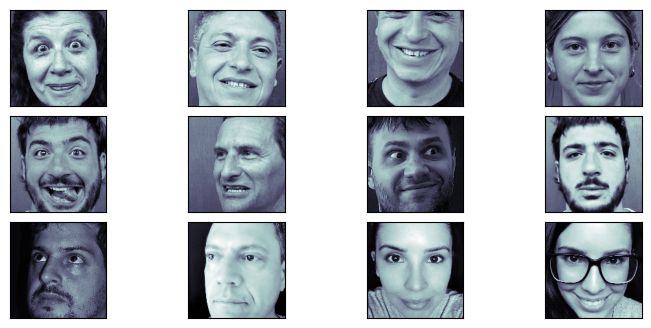

In [ ]:
# show dataset.
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='bone')

In [ ]:
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=12,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'   #reflext, default. fill mode determines how any empty pixels are filled after applying transformations.
)

# Reshape X_train if needed (assuming it has shape (num_samples, height, width))
X_train_aux = X_train.reshape(X_train.shape[0], 150, 150, 1)

# Perform data augmentation
augmented_images = []
augmented_labels = []

for image, label in zip(X_train_aux, t_train):
    iterator = datagen.flow(np.expand_dims(image, 0), batch_size=1)
    augmented_image = iterator.next()[0]
    augmented_images.append(augmented_image)
    augmented_labels.append(label)

# Convert the augmented images and labels back to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)



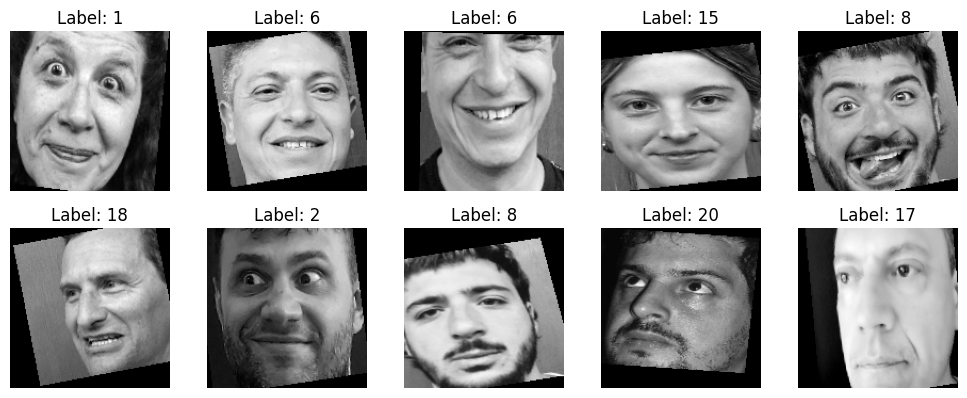

In [ ]:
# Define a function to plot images
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].reshape(150, 150), cmap='gray')
        plt.title("Label: {}".format(labels[i]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot augmented images
plot_images(augmented_images[:10], augmented_labels[:10])

In [ ]:
# Concatenate the augmented images and labels with the original datasets
X_train = np.concatenate((X_train, augmented_images.reshape(159, 150, 150)))
t_train = np.concatenate((t_train, augmented_labels))

In [ ]:
unique, counts = np.unique(t_train, return_counts=True)
import pandas as pd
data_aumentada = pd.DataFrame({'Persona': unique, 'Aparece': counts}, columns=['Persona', 'Aparece'])
data_aumentada 

,Persona,Aparece
0,0,14
1,1,14
2,2,14
3,3,14
4,4,14
5,5,14
6,6,14
7,7,14
8,8,14
9,9,14


# 2.PCA

Hago un reshaping para poder hacer el PCA



In [ ]:
# Reshaping the dataset
X_train = X_train.reshape(X_train.shape[0], 22500) 
X_test = X_test.reshape(X_test.shape[0], 22500)  

# Change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (318, 22500)
Testing matrix shape (69, 22500)


Estandarizo la variable, dividiendo 255 ya que las imagenes estaban en escala de grises.

In [ ]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 255.0
0.0 255.0
0.0 1.0
0.0 1.0


Realizo PCA que explique el 90% de la variabilidad de los datos. No realizo todos los pasos que hicimos en la unidad 3 del modulo 3 ya que no es el objetivo del practico. Asi que utilizo directamente los parametro `n_components=.90`.

In [ ]:
pca = PCA(n_components=.90, svd_solver = 'full')
pca.fit(X_train)

PCA(n_components=0.9, svd_solver='full')

***De la documentacion oficial:*** If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.



In [ ]:
print(f'Nro de componentes a utilizar en el PCA : {pca.n_components_}')

Nro de componentes a utilizar en el PCA : 101


Con 101 dimensiones, preservamos 0.9 del varianza.


Aplico el PCA a train y test

In [ ]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

print(f'train_img shape : {train_img.shape}')
#print(f'test_img shape : {test_img.shape}')

train_img shape : (318, 100)


Las etiquetas de `t_train` y `t_test` son números entre 0 y 24.

Convertimos las etiquetas de clase a la codificación 1-de-K. Para ello utilizamos la función `keras.utils.to_categorical` (similar al  `OneHotEncoder` de `sklearn`).


In [ ]:
encoder = OneHotEncoder()
t_train_ohe = encoder.fit_transform(t_train.reshape(-1, 1)).toarray()
t_test_ohe = encoder.fit_transform(t_test.reshape(-1, 1)).toarray()

print(t_train_ohe[:3], t_train[:3])
print(t_test_ohe[:3], t_test[:3])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [1 6 6]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [11 10 12]


# 3.Creación de la red

Codigo extraido de **backpropagation_01.py**

In [ ]:
#Funcion auxiliar
def marcar_maximo(vector):
    # Obtener el índice del máximo valor en cada columna
    indices_maximos = np.argmax(vector, axis=0)
    # Crear una matriz de ceros del mismo tamaño que el vector original
    resultado = np.zeros(vector.shape)
    # Marcar el máximo valor de cada columna con 1 en la fila correspondiente
    resultado[indices_maximos, np.arange(vector.shape[1])] = 1
    return resultado

def ierror(matriz1_Y, matriz2_y_hat):
    matriz2 = marcar_maximo(matriz2_y_hat.T).T
    comparacion = matriz1_Y != matriz2
    diferentes_por_fila = np.sum(comparacion, axis=1)
    
    return len(diferentes_por_fila[diferentes_por_fila==0])

In [ ]:
X = train_img
Y = t_train_ohe
print(X.shape)
print(Y.shape)

(318, 100)
(318, 23)


In [ ]:
def func_eval(fname, x):
    match fname:
        case "purelin":
            y = x
        case "logsig":
            y = 1.0 / ( 1.0 + math.exp(-x) )
        case "tansig":
            y = 2.0 / ( 1.0 + math.exp(-2.0*x) ) - 1.0
    return y

func_eval_vec = np.vectorize(func_eval)

def deriv_eval(fname, y):  #atencion que y es la entrada y=f( x )
    match fname:
        case "purelin":
            d = 1.0
        case "logsig":
            d = y*(1.0-y)
        case "tansig":
            d = 1.0 - y*y
    return d

deriv_eval_vec = np.vectorize(deriv_eval)


filas_qty = len(X)
input_size = X.shape[1]   # 100 entradas
hidden_size = 64  # neuronas capa oculta
output_size = Y.shape[1]  # 23 neurona

# defino las funciones de activacion de cada capa
hidden_FUNC = 'logsig'  # uso la logistica
output_FUNC = 'logsig'  # uso la tangente hiperbolica

np.random.seed(1021) #mi querida random seed para que las corridas sean reproducibles
W1 = np.random.uniform(-0.5, 0.5, [hidden_size, input_size])
X01 = np.random.uniform(-0.5, 0.5, [hidden_size, 1] )
W2 = np.random.uniform(-0.5, 0.5, [output_size, hidden_size])
X02 = np.random.uniform(-0.5, 0.5, [output_size, 1] )

# Avanzo la red, forward
# para TODOS los X al mismo tiempo ! 
#  @ hace el producto de una matrix por un vector_columna
hidden_estimulos = W1 @ X.T + X01
hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
output_estimulos = W2 @ hidden_salidas + X02
output_salidas = func_eval_vec(output_FUNC, output_estimulos)
#.....
# calculo el error promedi general de TODOS los X
Error= np.mean((len(Y) - ierror(Y, output_salidas.T))**2 )

Chequeo de la red

In [ ]:
print('Hay {} aciertos en el conjunto de validación sobre un total de {} imagenes. Lo que nos da un Error promedio genral: {}'.format(ierror(Y, output_salidas.T), len(Y), Error))

Hay 13 aciertos en el conjunto de validación sobre un total de 318 imagenes. Lo que nos da un Error promedio genral: 93025.0


In [ ]:
print('Hay {} aciertos en el conjunto de validación sobre un total de {} imagenes. Lo que nos da un Error promedio genral: {}'.format(ierror(Y, output_salidas.T), len(Y), Error))

Hay 11 aciertos en el conjunto de validación sobre un total de 318 imagenes. Lo que nos da un Error promedio genral: 94249.0


Hasta aca hicimos la primer corrida sin ajustar, por casualidad/suerte tuvimos 11 aciertos.

# Entrenamiento de la Red

In [ ]:
# Inicializo
epoch_limit = 2000    # para terminar si no converge
Error_umbral = 1.0e-06
learning_rate = 0.2
Error_last = 10    # lo debo poner algo dist a 0 la primera vez
epoch = 0

while ( math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
#while ( (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error

    # recorro siempre TODA la entrada
    for fila in range(filas_qty): #para cada input x_sub_fila del vector X
        # propagar el x hacia adelante
        hidden_estimulos = W1 @ X[fila:fila+1, :].T + X01
        hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
        output_estimulos = W2 @ hidden_salidas + X02
        output_salidas = func_eval_vec(output_FUNC, output_estimulos)

        # calculo los errores en la capa hidden y la capa output
        ErrorSalida = Y[fila:fila+1,:].T - output_salidas
        # output_delta es un solo numero
        output_delta = ErrorSalida * deriv_eval_vec(output_FUNC, output_salidas)
        # hidden_delta es un vector columna
        hidden_delta = deriv_eval_vec(hidden_FUNC, hidden_salidas)*(W2.T @ output_delta)

        # ya tengo los errores que comete cada capa
        # corregir matrices de pesos, voy hacia atras
        # backpropagation
        W1 = W1 + learning_rate * (hidden_delta @ X[fila:fila+1, :] )
        X01 = X01 + learning_rate * hidden_delta
        W2 = W2 + learning_rate * (output_delta @ hidden_salidas.T)
        X02 = X02 + learning_rate * output_delta

    # ya recalcule las matrices de pesos
    # ahora avanzo la red, feed-forward
    hidden_estimulos = W1 @ X.T + X01
    hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
    output_estimulos = W2 @ hidden_salidas + X02
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)

    # calculo el error promedio general de TODOS los X
    Error= np.mean((len(Y) - ierror(Y, output_salidas.T))**2 )




In [ ]:
print('Hay {} aciertos en el conjunto de validación sobre un total de {} imagenes. Lo que nos da un Error promedio genral: {}'.format(ierror(Y, output_salidas.T), len(Y), Error))

Hay 308 aciertos en el conjunto de validación sobre un total de 318 imagenes. Lo que nos da un Error promedio genral: 100.0


Si ponemos 64 neuronas en la capa intermedia y entrenamos 2.000 epocas tenemos un acierto de 315 para el conjunto de train. (Claramente esto es un sobre ajuste). Ahora vamos a ver que pasa con el conjunto de Test.

In [ ]:
X = test_img
Y = t_test_ohe

hidden_estimulos = W1 @ X.T + X01
hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
output_estimulos = W2 @ hidden_salidas + X02
output_salidas = func_eval_vec(output_FUNC, output_estimulos)

print('Error en test')
print('Hay {} aciertos en el conjunto de validación sobre un total de {} imagenes. Lo que nos da un Error promedio genral: {}'.format(ierror(Y, output_salidas.T), len(Y), np.mean((len(Y) - ierror(Y, output_salidas.T))**2 )))

Error en test
Hay 40 aciertos en el conjunto de validación sobre un total de 69 imagenes. Lo que nos da un Error promedio genral: 841.0


# Algoritmo modificado

In [ ]:
#Funcionees para saber la efectividad de la red
def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((predictions - labels)**2).sum() / (2*N)
    
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.argmax(axis=1) == labels.argmax(axis=1)
    accuracy = predicions_correct.mean()
    
    return accuracy

In [ ]:
NN_ARCHITECTURE = [
    # {"input_dim": 2, "output_dim": 4, "activation": "????"},
    # {"input_dim": 4, "output_dim": 2, "activation": "logsig"},
    # {"input_dim": 2, "output_dim": 1, "activation": "tansig"},
    {"input_dim": 100, "output_dim": 64, "activation": "logsig"},
    {"input_dim": 64, "output_dim": 23, "activation": "logsig"},
]
np.random.seed(1021)

def init_layers(nn_architecture, seed = 1021):
    # random seed initiation
    np.random.seed(seed)
    # # number of layers in our neural network
    # number_of_layers = len(nn_architecture)

    # parameters storage initiation
    params_values = {}
    
    # iteration over network layers
    for idx, layer in enumerate(nn_architecture):
        # we number network layers from 1
        layer_idx = idx + 1
        
        # extracting the number of units in layers
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        # initiating the values of the W matrix
        # and vector b for subsequent layers
        params_values['W' + str(layer_idx)] = np.random.uniform(-0.5, 0.5, [layer_output_size, layer_input_size])
        params_values['b' + str(layer_idx)] = np.random.uniform(-0.5, 0.5, [layer_output_size, 1])
        
    return params_values

def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    # calculation of the input value for the activation function
    #hidden|output_estimulos W1 @ X.T + X01 #no hago la transpuesta de X porque lo hago antes de llamar al metodo.
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    # return of calculated activation A and the intermediate Z matrix
    return func_eval_vec(activation, Z_curr), Z_curr

def full_forward_propagation(X, params_values, nn_architecture):
    # creating a temporary memory to store the information needed for a backward step
    memory = {}
    # X vector is the activation for layer 0 
    A_curr = X
    
    # iteration over network layers
    for idx, layer in enumerate(nn_architecture):
        # we number network layers from 1
        layer_idx = idx + 1
        # transfer the activation from the previous iteration
        A_prev = A_curr
        
        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]
        # extraction of W for the current layer
        W_curr = params_values["W" + str(layer_idx)]
        # extraction of b for the current layer
        b_curr = params_values["b" + str(layer_idx)]
        # calculation of activation for the current layer
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        
        # saving calculated values in the memory
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    # return of prediction vector and a dictionary containing intermediate values
    return A_curr, memory

def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    # number of examples
    m = A_prev.shape[1]

    # calculation of the activation function derivative
    #dZ_curr = backward_activation_func(dA_curr, Z_curr)
    dZ_curr = func_eval_vec(activation, Z_curr)
    
    # derivative of the matrix W
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    # derivative of the vector b
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    # derivative of the matrix A_prev
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    
    # number of examples
    m = Y.shape[1]
    # a hack ensuring the same shape of the prediction vector and labels vector
    Y = Y.reshape(Y_hat.shape)
    
    # initiation of gradient descent algorithm
    dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat));
    
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        # we number network layers from 1
        layer_idx_curr = layer_idx_prev + 1
        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]
        
        dA_curr = dA_prev
        
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)
        
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values
  
def update(params_values, grads_values, nn_architecture, learning_rate):

    # iteration over network layers
    for layer_idx, layer in enumerate(nn_architecture, 1):
        params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]        
        params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return params_values

In [ ]:
#Nuevo
def get_cost_value(Y_hat, Y):
    # number of examples
    m = Y_hat.shape[1]
    # calculation of the cost according to the formula
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)

# an auxiliary function that converts probability into class
def convert_prob_into_class(probs):
    probs_ = np.copy(probs)
    probs_[probs_ > 0.5] = 1
    probs_[probs_ <= 0.5] = 0
    return probs_

def get_accuracy_value(Y_hat, Y):
    Y_hat_ = ierror(Y, Y_hat.T)
    return Y_hat_/len(Y)

In [ ]:

def train(X, Y, nn_architecture, epochs, learning_rate, verbose=False, callback=None):
    # initiation of neural net parameters
    
    params_values = init_layers(nn_architecture, 2)
    # initiation of lists storing the history 
    # of metrics calculated during the learning process 
    cost_history = []
    accuracy_history = []
    
    # performing calculations for subsequent iterations
    epoch_limit = 0
    error_last = 10
    error_umbral = 1.0e-06

    Y_hat, _ = full_forward_propagation(X, params_values, nn_architecture)
    error = np.mean( (Y.T - Y_hat)**2 ) 
    
    #for i in range(epochs):
    #while ( math.fabs(error_last - error)>error_umbral and (epoch_limit < epochs)):
    while (epoch_limit < epochs):

        epoch_limit += 1
        error_last = error
        # for X_one, Y_one in zip(X.T, Y):
        #   X_one = X_one.T
        #   X_one = X_one.reshape(X_one.shape[0],1)
        #   Y_one = Y_one.reshape(Y_one.shape[0],1)
        #   # step forward
        #   Y_hat, cashe = full_forward_propagation(X_one, params_values, nn_architecture)
        #   # step backward - calculating gradient
        #   #print(cashe)
        #   grads_values = full_backward_propagation(Y_hat, Y_one, cashe, params_values, nn_architecture)
        #   # updating model state
        #   params_values = update(params_values, grads_values, nn_architecture, learning_rate)
        #   print(params_values)

        Y_hat, cashe = full_forward_propagation(X, params_values, nn_architecture)
        grads_values = full_backward_propagation(Y_hat, Y, cashe, params_values, nn_architecture)
        params_values = update(params_values, grads_values, nn_architecture, learning_rate)



        # calculating metrics and saving them in history
        #cost = get_cost_value(Y_hat, Y)
        #cost_history.append(cost)
        cost = 1
        accuracy = get_accuracy_value(Y_hat, Y)
        accuracy_history.append(accuracy)
        error = np.mean((len(Y) - ierror(Y, Y_hat.T))**2 )
        # print(accuracy)
        # print(error)
        if(verbose):
            print("Epoch: {:05} - cost: {:.5f} - accuracy: {:.5f} - EMC: {:.5f}".format(epoch_limit, cost, accuracy, error))
        if(callback is not None):
            callback(epoch_limit, params_values)

            
    return params_values

In [ ]:
#TRAIN
# X = train_img
# Y = t_train_ohe
#TEST
# X = test_img
# Y = t_test_ohe

Entrenamiento de la red

In [ ]:
params_values = train(train_img.T, t_train_ohe, NN_ARCHITECTURE, 2000, 0.2, verbose=True)

Epoch: 00001 - cost: 1.00000 - accuracy: 0.02830 - EMC: 95481.00000
Epoch: 00002 - cost: 1.00000 - accuracy: 0.05031 - EMC: 91204.00000
Epoch: 00003 - cost: 1.00000 - accuracy: 0.04088 - EMC: 93025.00000
Epoch: 00004 - cost: 1.00000 - accuracy: 0.04088 - EMC: 93025.00000
Epoch: 00005 - cost: 1.00000 - accuracy: 0.03145 - EMC: 94864.00000
Epoch: 00006 - cost: 1.00000 - accuracy: 0.04088 - EMC: 93025.00000
Epoch: 00007 - cost: 1.00000 - accuracy: 0.03774 - EMC: 93636.00000
Epoch: 00008 - cost: 1.00000 - accuracy: 0.04088 - EMC: 93025.00000
Epoch: 00009 - cost: 1.00000 - accuracy: 0.04088 - EMC: 93025.00000
Epoch: 00010 - cost: 1.00000 - accuracy: 0.05346 - EMC: 90601.00000
Epoch: 00011 - cost: 1.00000 - accuracy: 0.04403 - EMC: 92416.00000
Epoch: 00012 - cost: 1.00000 - accuracy: 0.04403 - EMC: 92416.00000
Epoch: 00013 - cost: 1.00000 - accuracy: 0.04088 - EMC: 93025.00000
Epoch: 00014 - cost: 1.00000 - accuracy: 0.04088 - EMC: 93025.00000
Epoch: 00015 - cost: 1.00000 - accuracy: 0.04088

Evaluacion en Train y Test

In [ ]:
Y_train_hat, _ = full_forward_propagation(np.transpose(train_img), params_values, NN_ARCHITECTURE)
print('Error en train')
print('Hay {} aciertos en el conjunto de validación sobre un total de {} imagenes. Lo que nos da un Error promedio genral: {}'.format(ierror(t_train_ohe, Y_train_hat.T), len(t_train_ohe), np.mean((len(t_train_ohe) - ierror(t_train_ohe, Y_train_hat.T))**2 )))

Y_test_hat, _ = full_forward_propagation(np.transpose(test_img), params_values, NN_ARCHITECTURE)
print('Error en Test')
print('Hay {} aciertos en el conjunto de validación sobre un total de {} imagenes. Lo que nos da un Error promedio genral: {}'.format(ierror(t_test_ohe, Y_test_hat.T), len(t_test_ohe), np.mean((len(t_test_ohe) - ierror(t_test_ohe, Y_test_hat.T))**2 )))


Error en train
Hay 13 aciertos en el conjunto de validación sobre un total de 318 imagenes. Lo que nos da un Error promedio genral: 93025.0
Error en Test
Hay 2 aciertos en el conjunto de validación sobre un total de 69 imagenes. Lo que nos da un Error promedio genral: 4489.0


In [ ]:
NN_ARCHITECTURE_2 = [
    # {"input_dim": 2, "output_dim": 4, "activation": "????"},
    # {"input_dim": 4, "output_dim": 2, "activation": "logsig"},
    # {"input_dim": 2, "output_dim": 1, "activation": "tansig"},
    {"input_dim": 100, "output_dim": 64, "activation": "logsig"},
    {"input_dim": 64, "output_dim": 32, "activation": "logsig"},
    {"input_dim": 32, "output_dim": 23, "activation": "logsig"},
]

params_values2 = train(train_img.T, t_train_ohe, NN_ARCHITECTURE_2, 2000, 0.2, verbose=True)

Epoch: 00001 - cost: 1.00000 - accuracy: 0.03145 - EMC: 94864.00000
Epoch: 00002 - cost: 1.00000 - accuracy: 0.05346 - EMC: 90601.00000
Epoch: 00003 - cost: 1.00000 - accuracy: 0.04403 - EMC: 92416.00000
Epoch: 00004 - cost: 1.00000 - accuracy: 0.05031 - EMC: 91204.00000
Epoch: 00005 - cost: 1.00000 - accuracy: 0.04403 - EMC: 92416.00000
Epoch: 00006 - cost: 1.00000 - accuracy: 0.04088 - EMC: 93025.00000
Epoch: 00007 - cost: 1.00000 - accuracy: 0.04717 - EMC: 91809.00000
Epoch: 00008 - cost: 1.00000 - accuracy: 0.05031 - EMC: 91204.00000
Epoch: 00009 - cost: 1.00000 - accuracy: 0.05660 - EMC: 90000.00000
Epoch: 00010 - cost: 1.00000 - accuracy: 0.05346 - EMC: 90601.00000
Epoch: 00011 - cost: 1.00000 - accuracy: 0.04088 - EMC: 93025.00000
Epoch: 00012 - cost: 1.00000 - accuracy: 0.05031 - EMC: 91204.00000
Epoch: 00013 - cost: 1.00000 - accuracy: 0.05975 - EMC: 89401.00000
Epoch: 00014 - cost: 1.00000 - accuracy: 0.05031 - EMC: 91204.00000
Epoch: 00015 - cost: 1.00000 - accuracy: 0.05975

In [ ]:
Y_train_hat, _ = full_forward_propagation(np.transpose(train_img), params_values2, NN_ARCHITECTURE_2)
print('Error en train')
print('Hay {} aciertos en el conjunto de validación sobre un total de {} imagenes. Lo que nos da un Error promedio genral: {}'.format(ierror(t_train_ohe, Y_train_hat.T), len(t_train_ohe), np.mean((len(t_train_ohe) - ierror(t_train_ohe, Y_train_hat.T))**2 )))

Y_test_hat, _ = full_forward_propagation(np.transpose(test_img), params_values2, NN_ARCHITECTURE_2)
print('Error en Test')
print('Hay {} aciertos en el conjunto de validación sobre un total de {} imagenes. Lo que nos da un Error promedio genral: {}'.format(ierror(t_test_ohe, Y_test_hat.T), len(t_test_ohe), np.mean((len(t_test_ohe) - ierror(t_test_ohe, Y_test_hat.T))**2 )))


Error en train
Hay 12 aciertos en el conjunto de validación sobre un total de 318 imagenes. Lo que nos da un Error promedio genral: 93636.0
Error en Test
Hay 3 aciertos en el conjunto de validación sobre un total de 69 imagenes. Lo que nos da un Error promedio genral: 4356.0
